In [2]:
import pandas as pd 
import plotly.express as px  # For high-level API
import plotly.graph_objects as go  # For low-level API
import plotly.io as pio  # For handling input/output operations like saving figures


In [3]:
data = pd.read_csv("customer_acquisition_data.csv")

In [5]:
data.head(5)



,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


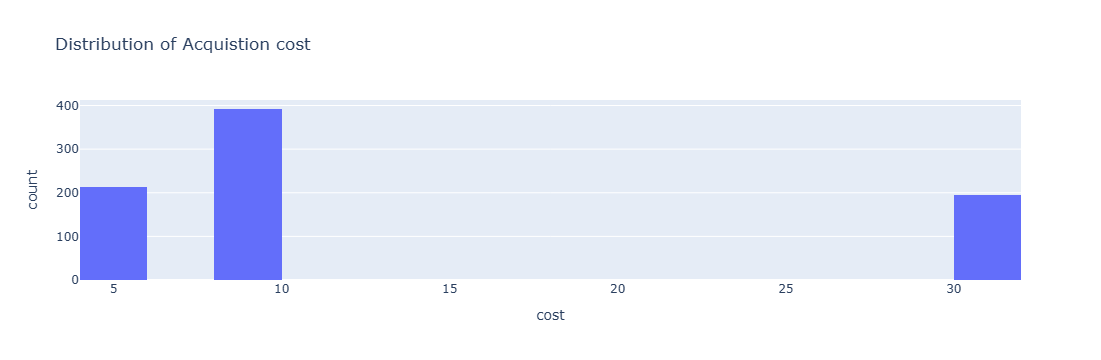

In [32]:
fig = px.histogram(data,x = "cost",
                   nbins = 20 ,
                   title = "Distribution of Acquistion cost")
fig.show()

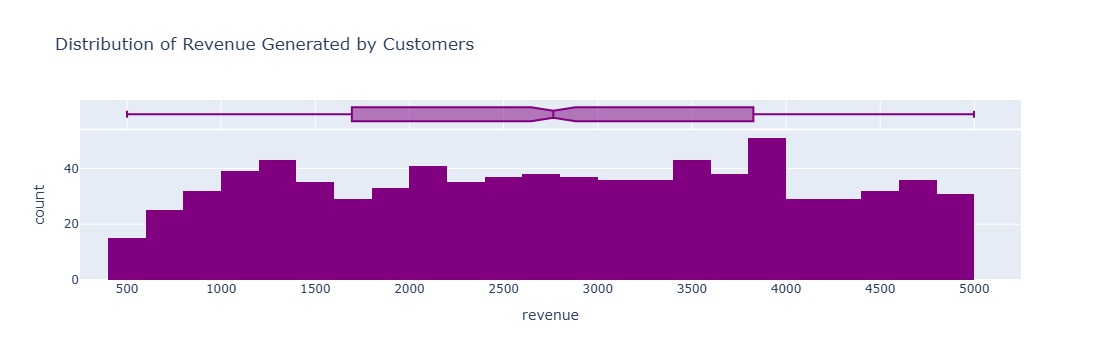

In [21]:
import plotly.express as px

fig = px.histogram(data, x="revenue", 
                   title="Distribution of Revenue Generated by Customers",
                   nbins=30,  
                   marginal="box",
                   color_discrete_sequence=["purple"])

fig.show()


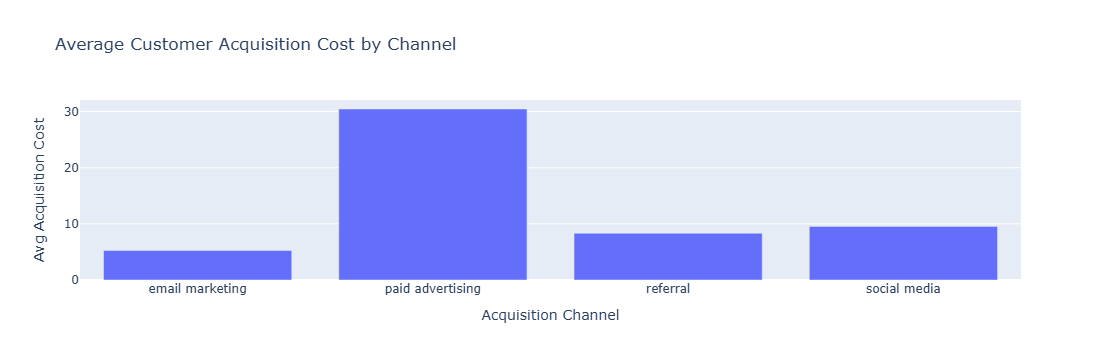

In [39]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()

fig = px.bar(cost_by_channel, x="channel", y="cost", 
             title="Average Customer Acquisition Cost by Channel",
             labels={"cost": "Avg Acquisition Cost", "channel": "Acquisition Channel"}
            )

fig.show()

In [34]:
cost_by_channel 

,channel,cost
0,email marketing,5.246263
1,paid advertising,30.450327
2,referral,8.320327
3,social media,9.546326


In [7]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()

In [8]:
conversion_by_channel

,channel,conversion_rate
0,email marketing,0.043822
1,paid advertising,0.016341
2,referral,0.123145
3,social media,0.167592


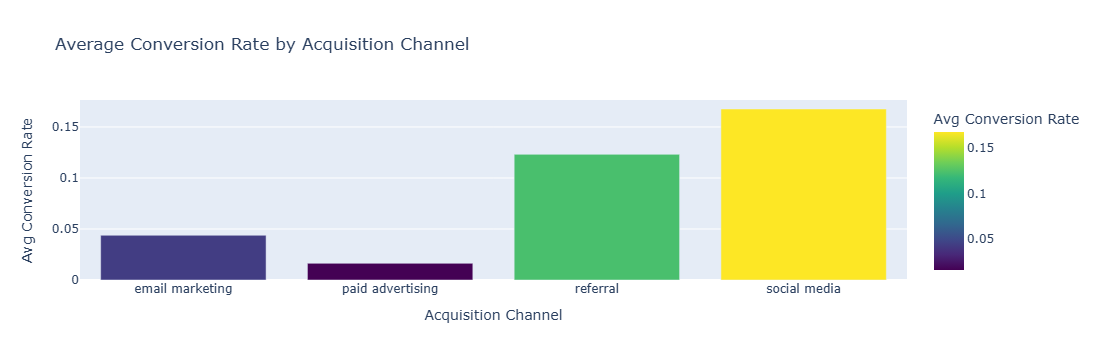

In [10]:
fig = px.bar(conversion_by_channel, x="channel", y="conversion_rate",
             title="Average Conversion Rate by Acquisition Channel",
             labels={"conversion_rate": "Avg Conversion Rate", "channel": "Acquisition Channel"},
             color="conversion_rate",
             color_continuous_scale="viridis")

fig.show()

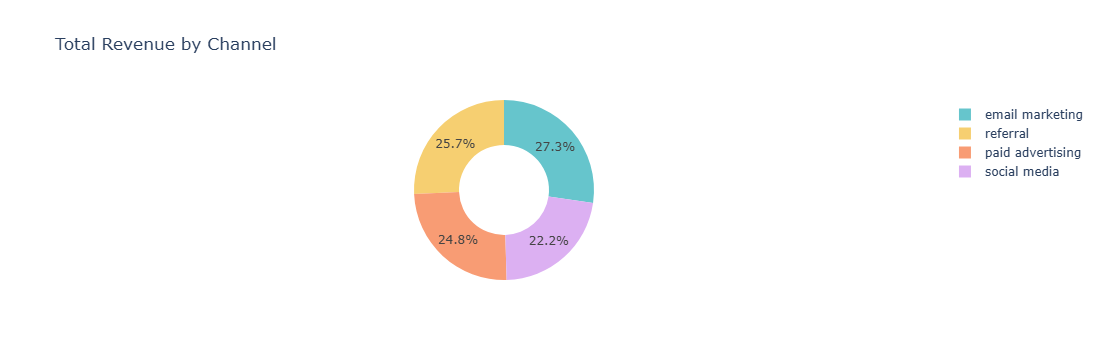

In [25]:
Revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()

fig = px.pie(Revenue_by_channel,values = 'revenue',names = 'channel',title = 'Total Revenue by Channel', hole = 0.5,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [21]:
Revenue_by_channel

,channel,revenue
0,email marketing,604706
1,paid advertising,548396
2,referral,569552
3,social media,492667


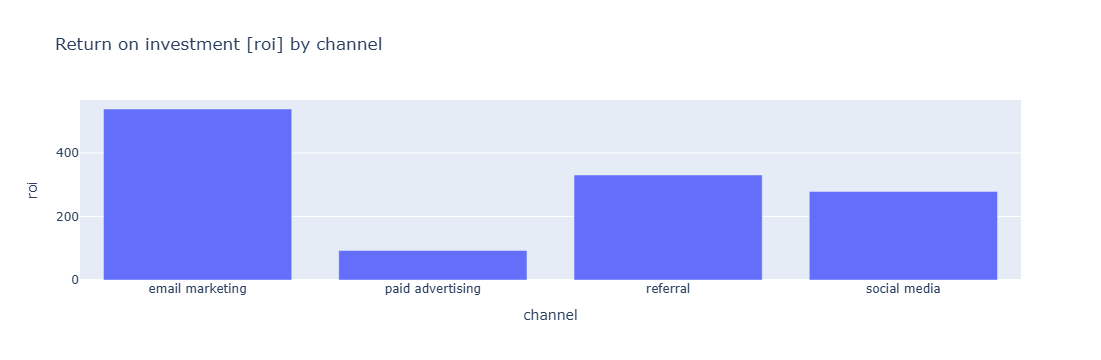

In [27]:
data['roi'] = data['revenue']/data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

fig = px.bar(roi_by_channel,x = "channel", y = "roi", 
             title = "Return on investment [roi] by channel")
fig.show()